# PROBLEM STATEMENT

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The attribute to be predicted is the class of iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolour, 3. Iris Virginica

There are 4 features: 
1. sepalLength: sepal length in cm
2. sepalWidth: sepal width in cm
3. petalLength: petal length in cm
4. petalWidth: petal width in cm

There are 3 classes represneting class label of iris flower {1,2,3} 
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica

# IMPORTING DATASET

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data  = pd.read_csv("Iris.csv")

In [4]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
data.shape

(150, 5)

# VISUALIZING DATA

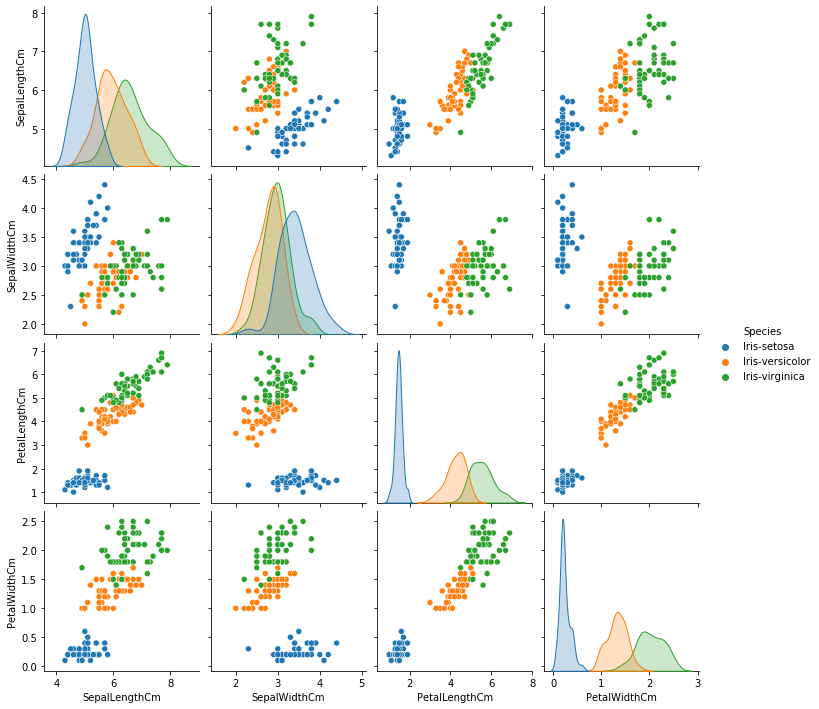

In [16]:
sns.pairplot(data,hue='Species')

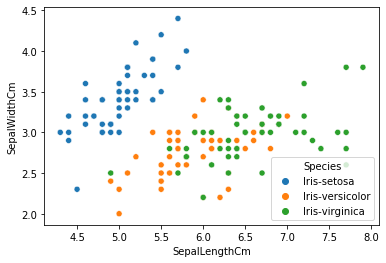

In [17]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species', data=data)

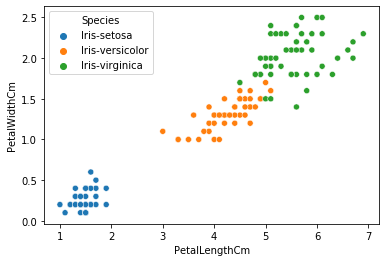

In [18]:
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = data)

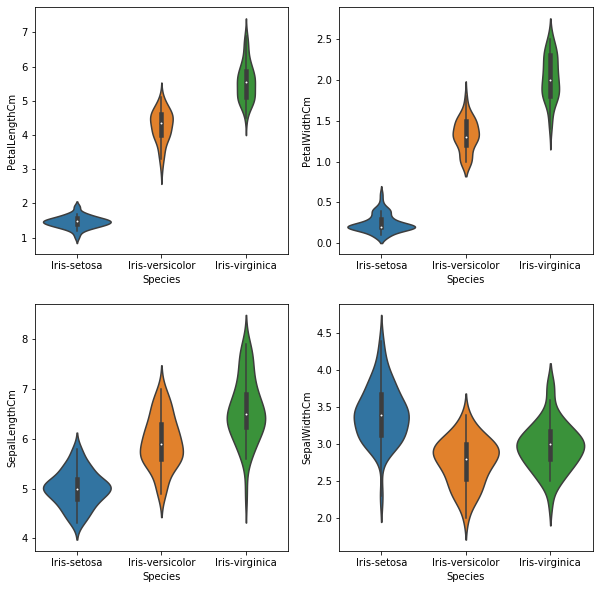

In [19]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)

plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)

plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)

plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

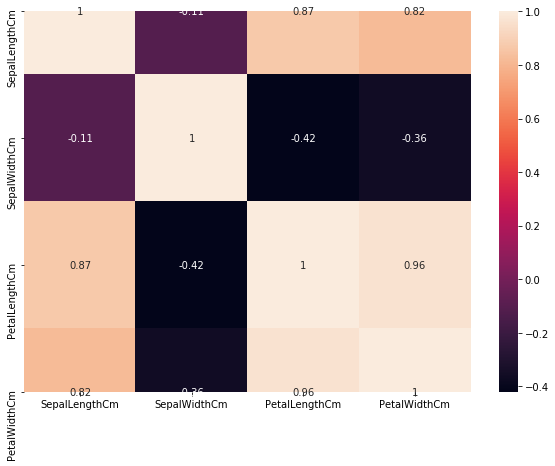

In [20]:
plt.figure(figsize=(10,7)) 
sns.heatmap(data.corr(),annot=True) 

# DATA CLEANING

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [43]:
X = data.drop('Species',axis=1)

In [44]:
y = data['Species']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.25,random_state = 0)

# TRINING THE MODEL

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knc.fit(X_train,y_train)

KNeighborsClassifier()

# EVALUATING RESULTS

In [48]:
y_pred = knc.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [50]:
cm = confusion_matrix(y_test,y_pred)

In [51]:
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [53]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

